In [1]:
import re

import pandas as pd
#import seaborn as sns
import ast
import matplotlib.pyplot as plt
import json
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words

In [2]:
DIALOGS_MERGED_DATA_PATH = '../data/merged_data/dialogs_data_all.csv'
DIALOGS_META_MERGED_DATA_PATH = '../data/merged_data/dialogs_users_all.csv'

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

/var/folders/bh/3l9wxlcd22l8v712jjsb0p7h0000gn/T/ipykernel_51827/1251569782.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)


In [4]:
df

id                       date                      from_id  \
0         292  2020-11-15 16:44:50+00:00                          NaN   
1         291  2020-11-04 16:40:17+00:00                          NaN   
2         290  2020-10-27 14:31:26+00:00                          NaN   
3         289  2020-10-12 10:54:51+00:00                          NaN   
4         288  2020-10-07 17:17:59+00:00                          NaN   
...       ...                        ...                          ...   
929943  80039  2021-05-31 17:10:35+00:00  PeerUser(user_id=331389579)   
929944  80038  2021-05-31 16:45:03+00:00                          NaN   
929945  80037  2021-05-31 16:45:01+00:00                          NaN   
929946  80032  2021-05-31 15:42:56+00:00  PeerUser(user_id=331389579)   
929947  80029  2021-05-31 15:40:26+00:00  PeerUser(user_id=331389579)   

                                     to_id fwd_from  \
0       PeerChannel(channel_id=1073606490)      NaN   
1       PeerChannel(channel_id=1073606490)      NaN   
2       PeerChannel(channel_id=1073606490)      NaN   
3       PeerChannel(channel_id=1073606490)      NaN   
4       PeerChannel(channel_id=1073606490)      NaN   
...                                    ...      ...   
929943                           980755984      NaN   
929944                           331389579      NaN   
929945                           331389579      NaN   
929946                           980755984      NaN   
929947                           980755984      NaN   

                                                  message   type  duration  \
0       –í—Å—ñ–º –ø—Ä–∏–≤—ñ—Ç!\n\n–°—Ç–æ—Å–æ–≤–Ω–æ –Ω–∞—Å—Ç—É–ø–Ω–æ—ó –≤–∏–¥–∞—á—ñ –ø—Ä–æ—ó...   text       NaN   
1       –í—Å—ñ–º –ø—Ä–∏–≤—ñ—Ç!\n–°—Ç–æ—Å–æ–≤–Ω–æ –ø–æ–≤–µ—Ä–Ω–µ–Ω–Ω—è –ø—Ä–æ—ó–∑–Ω–∏—Ö.\n\...   text       NaN   
2       –í—Å—ñ–º –ø—Ä–∏–≤—ñ—Ç!\n\n–°—Ç–æ—Å–æ–≤–Ω–æ –ø–æ–≤–µ—Ä–Ω–µ–Ω–Ω—è –∫–æ—à—Ç—ñ–≤. \n...   text       NaN   
3       –í—Å—ñ–º –ø—Ä–∏–≤—ñ—Ç!\n\n–ß–µ—Ä–≥–æ–≤–∞ –≤–∏–¥–∞—á–∞ –ø—Ä–æ—ó–∑–Ω–∏—Ö –≤—ñ–¥–±—É–¥...   text       NaN   
4       –ù–∞–≥–∞–¥—É—é, –∑–∞–º–æ–≤–ª—è—î–º–æ, —è–∫ —ñ –º–∏–Ω—É–ª—ñ —Ä–∞–∑–∏: —è–∫—â–æ –∑–∞...   text       NaN   
...                                                   ...    ...       ...   
929943                                  Google pay\n14448   text       NaN   
929944  –Ω–∞–ø–∏—à–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, e-mail, –∫–æ—Ç–æ—Ä—ã–π —É–∫–∞–∑—ã–≤–∞–ª...   text       NaN   
929945                                       –î–æ–±—Ä—ã–π –¥–µ–Ω—å!   text       NaN   
929946                                                NaN  photo       NaN   
929947                                   –ü—Ä–∏–≤–µ—Ç, –æ–ø–ª–∞—á–µ–Ω–æ   text       NaN   

            dialog_id  
0      -1001073606490  
1      -1001073606490  
2      -1001073606490  
3      -1001073606490  
4      -1001073606490  
...               ...  
929943      980755984  
929944      980755984  
929945      980755984  
929946      980755984  
929947      980755984  

[929948 rows x 9 columns]

In [5]:
df_meta

dialog_id                name            type  \
0    -1001107649996       –§—ñ—àe–Ω—è—Ç–∞ –ö–ù–Ü–¢           Group   
1    -1001107649996       –§—ñ—àe–Ω—è—Ç–∞ –ö–ù–Ü–¢           Group   
2    -1001107649996       –§—ñ—àe–Ω—è—Ç–∞ –ö–ù–Ü–¢           Group   
3    -1001107649996       –§—ñ—àe–Ω—è—Ç–∞ –ö–ù–Ü–¢           Group   
4    -1001107649996       –§—ñ—àe–Ω—è—Ç–∞ –ö–ù–Ü–¢           Group   
...             ...                 ...             ...   
5210      945518395  Rozetka HelpCenter  Private dialog   
5211      951605505                –ú–∞–∫—Å  Private dialog   
5212      957962512  StopRussia | MRIYA  Private dialog   
5213      977432525            –¥–∞–Ω—è —Ä–æ–±  Private dialog   
5214      980755984      Mr Mozart Help  Private dialog   

                                                  users  
0     {'user_id': 281396127, 'first_name': '–°—ñ–º–∞', '...  
1     {'user_id': 384845835, 'first_name': 'Michael'...  
2     {'user_id': 405045606, 'first_name': 'Katherin...  
3     {'user_id': 234938306, 'first_name': '–î—é–Ω–∞—Ä', ...  
4     {'user_id': 365047140, 'first_name': 'Dariya',...  
...                                                 ...  
5210  {'user_id': 945518395, 'first_name': 'Rozetka ...  
5211  {'user_id': 951605505, 'first_name': '–ú–∞–∫—Å', '...  
5212  {'user_id': 957962512, 'first_name': 'StopRuss...  
5213  {'user_id': 977432525, 'first_name': '–¥–∞–Ω—è —Ä–æ–±...  
5214  {'user_id': 980755984, 'first_name': 'Mr Mozar...  

[5215 rows x 4 columns]

In [6]:
df.shape

(929948, 9)

In [7]:
min(df['date']),max(df['date'])

('2017-08-03 11:43:37+00:00', '2022-11-28 19:32:44+00:00')

In [8]:
df.groupby(['type'])['type'].count()

type
photo       44227
sticker     24010
text       850931
video        7464
voice        3316
Name: type, dtype: int64

In [9]:
df.groupby(['type'])['duration'].sum()

type
photo           0.0
sticker         0.0
text            0.0
video      335625.0
voice       32221.0
Name: duration, dtype: float64

### Merging datasets

In [10]:
SOURCE_UNKNOWN = 'unknown'
SOURCE_USER = 'user'
SOURCE_CHANNEL = 'channel'

MY_TELEGRAM_ID = '331389579'

In [11]:


class PrepareDataset:


    def __init__(self, dialog_data, dialog_meta):
        self.dialog_data = dialog_data.copy(deep=True)
        self.dialog_meta = dialog_meta.copy(deep=True)


    def prepare_dialog_meta(self):
        self.dialog_meta['user_id'] = self.dialog_meta['users'].apply(lambda obj: str(eval(obj).get('user_id')))
        self.dialog_meta['first_name'] = self.dialog_meta['users'].apply(lambda obj: eval(obj).get('first_name'))
        self.dialog_meta['last_name'] = self.dialog_meta['users'].apply(lambda obj: eval(obj).get('last_name'))
        self.dialog_meta['phone'] = self.dialog_meta['users'].apply(lambda obj: eval(obj).get('phone'))
        self.dialog_meta['username'] = self.dialog_meta['users'].apply(lambda obj: eval(obj).get('username'))
        return self.dialog_meta

    def prepare_dialog_data(self):
        self.assign_source()
        self.clean_from_to_id()
        self.clean_date()
        return self.dialog_data

    @staticmethod
    def _assign_source(from_id):
        if from_id is None or not isinstance(from_id, str):
            return SOURCE_UNKNOWN
        if from_id.startswith('PeerUser(user_id') or from_id.isdigit():
            return SOURCE_USER
        elif from_id.startswith('PeerChannel(channel_id'):
            return SOURCE_CHANNEL
        return SOURCE_UNKNOWN

    def assign_source(self):
        self.dialog_data['from_source'] = self.dialog_data['from_id'].apply(self._assign_source)
        self.dialog_data['to_source'] = self.dialog_data['to_id'].apply(self._assign_source)

    def clean_from_to_id(self):
        def _clean_from_id(from_id):
            if from_id is None or not isinstance(from_id, str):
                return None
            id_regexp = r'\D*(\d+)'
            matched = re.match(id_regexp, from_id)
            if not matched:
                return None
            return matched.groups()[0]
        self.dialog_data['from_id_orig'] = self.dialog_data['from_id']
        self.dialog_data['from_id'] = self.dialog_data['from_id'].apply(_clean_from_id)
        self.dialog_data['to_id_orig'] = self.dialog_data['to_id']
        self.dialog_data['to_id'] = self.dialog_data['to_id'].apply(_clean_from_id)


    def clean_date(self):
        self.dialog_data['date'] = pd.to_datetime(self.dialog_data['date'], errors='coerce')

    def merge_data(self):
        self.prepare_dialog_meta()
        self.prepare_dialog_data()
        users_df = self.dialog_meta[['user_id', 'first_name', 'last_name', 'phone', 'username']]
        dialog_data_df = self.dialog_meta[['dialog_id', 'name', 'type']].rename(columns={'type': 'dialog_type'})

        users_df = users_df.drop_duplicates(subset='user_id')
        merged_df = pd.merge(left=self.dialog_data, right=users_df, left_on="from_id", right_on="user_id")
        #merged_df = pd.merge(left=merged_df, right=users_df, left_on="to_id", right_on="user_id", suffixes=('_from', '_to'))
        #merged_df = pd.merge(left=merged_df, right=dialog_data_df, left_on="dialog_id", right_on="dialog_id")
        return merged_df

merged_data = PrepareDataset(df, df_meta).merge_data()
merged_data

id                      date     from_id       to_id  \
0       118074 2022-08-26 17:01:26+00:00   281396127  1107649996   
1       118073 2022-08-26 16:55:59+00:00   281396127  1107649996   
2       118071 2022-04-07 10:41:26+00:00   281396127  1107649996   
3       118069 2022-04-07 10:00:34+00:00   281396127  1107649996   
4       118064 2022-02-05 13:46:46+00:00   281396127  1107649996   
...        ...                       ...         ...         ...   
760622   93978 2022-05-23 07:12:34+00:00  1138333234   739745073   
760623   93657 2022-05-19 17:38:48+00:00  1138333234   739745073   
760624   93640 2022-05-19 10:07:52+00:00  1138333234   739745073   
760625   93636 2022-05-19 09:43:19+00:00  1138333234   739745073   
760626   93635 2022-05-19 09:29:55+00:00  1138333234   739745073   

                                                 fwd_from  \
0                                                     NaN   
1       MessageFwdHeader(date=datetime.datetime(2022, ...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
760622                                                NaN   
760623                                                NaN   
760624                                                NaN   
760625                                                NaN   
760626                                                NaN   

                                                  message  type  duration  \
0                    –ò –ø—Ä–æ—Å—Ç–æ –∫–∞—Ä—Ç–∞ \n4731 2196 3160 0412  text       NaN   
1       –í—Å—ñ–º –ø—Ä–∏–≤—ñ—Ç!\n–°—å–æ–≥–æ–¥–Ω—ñ –Ω–∞—à–æ–º—É –≤–∏–∫–ª–∞–¥–∞—á—É –í–æ–∑–Ω—é–∫...  text       NaN   
2       –í –ª–∏—á–∫—É —Ç–æ—á–Ω–æ –º–æ–∂–Ω–æ –≤—Å–µ–≥–¥–∞ –Ω–∞–ø–∏—Å–∞—Ç—å –µ—Å–ª–∏ –∑–Ω–∞–µ—à...  text       NaN   
3                    –ó–∞—á–µ–º –ø–∏—Å–∞—Ç—å –≤ –±–µ—Å–µ–¥—É –∞ –Ω–µ –≤ –ª–∏—á–∫—É?)  text       NaN   
4                              –ù–µ —Ç–∞–∫ –¥–æ–ª–≥–æ —Ä–∞–±–æ—Ç–∞—é—â–∞—è...  text       NaN   
...                                                   ...   ...       ...   
760622  –ü–æ–¥–∏–≤—ñ—Ç—å—Å—è –æ—Ü—ñ–Ω–∫–∏ –∑–∞ –∫—É—Ä—Å –†–æ–∑–ø–æ–¥—ñ–ª–µ–Ω—ñ –æ–±—á–∏—Å–ª–µ–Ω...  text       NaN   
760623  –•–ª–æ–ø—Ü—ñ, —Ü–µ —Å–æ—Ä–æ–º, –∫–æ–ª–∏ –¥—ñ–¥—É—Å—å –≤–∏–ø—Ä–æ—à—É—î –ø—Ä–µ–∑–µ–Ω—Ç...  text       NaN   
760624  –¢–∞–∫, –∞ –¥–µ –≤–∏ –±—É–ª–∏ —Ä–∞–Ω—ñ—à–µ? –î—É–±—á–∞–∫ –∑–∞–±—É–≤,  –í–∏ –Ω–µ...  text       NaN   
760625  –Ø –ø–µ—Ä–µ–¥–∏–≤–∏–≤—Å—è —Å–≤–æ—ó –∑–∞–ø–∏—Å–∏, —Å—Ç–æ—Ä—ñ–Ω–∫–∏ –Ω–∞ –î—ñ—Å—Ç–µ–¥—É...  text       NaN   
760626                         –®–∞–Ω–æ–≤–Ω–∞ –ú–ü –ö–ù-1 –Ü–Ω—Ñ–æ–≥—Ä—É–ø–∞!  text       NaN   

            dialog_id from_source to_source                  from_id_orig  \
0      -1001107649996        user   channel   PeerUser(user_id=281396127)   
1      -1001107649996        user   channel   PeerUser(user_id=281396127)   
2      -1001107649996        user   channel   PeerUser(user_id=281396127)   
3      -1001107649996        user   channel   PeerUser(user_id=281396127)   
4      -1001107649996        user   channel   PeerUser(user_id=281396127)   
...               ...         ...       ...                           ...   
760622     -739745073        user   unknown  PeerUser(user_id=1138333234)   
760623     -739745073        user   unknown  PeerUser(user_id=1138333234)   
760624     -739745073        user   unknown  PeerUser(user_id=1138333234)   
760625     -739745073        user   unknown  PeerUser(user_id=1138333234)   
760626     -739745073        user   unknown  PeerUser(user_id=1138333234)   

                                to_id_orig     user_id first_name  \
0       PeerChannel(channel_id=1107649996)   281396127       –°—ñ–º–∞   
1       PeerChannel(channel_id=1107649996)   281396127       –°—ñ–º–∞   
2       PeerChannel(channel_id=1107649996)   281396127       –°—ñ–º–∞   
3       PeerChan

## ANALYSIS

In [101]:
sent_by_me_df = merged_data.loc[merged_data['from_id'] == MY_TELEGRAM_ID]

### 1. Wordcloud of my most used words

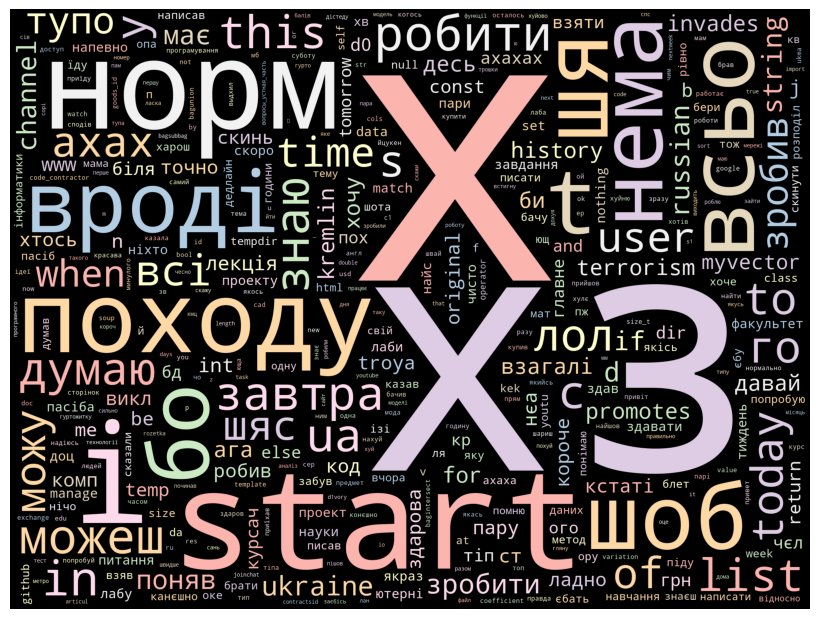

In [106]:

stop_words =  set(get_stop_words('russian')) | set(get_stop_words('ukrainian')) | {
    'http', '—à–æ', 'https', '–±–ª—è', '–±–ª—è—Ç—å', '—Ö—É–π–Ω—è', '–Ω—ñ—Ö—É—è', '–Ω—î', '–æ–∫', '—à–µ', '—à–æ—Å—å', 'the', '—è–∫—à–æ', 'com', '—Ö', '', '', '', '', '', '', '', '', '', '', ''
}


all_words = ""
for message in sent_by_me_df['message'].tolist():
    if not isinstance(message, str):
        continue
    text = re.sub(r'\W+', ' ', message).replace("\n", "").lower()
    words = nltk.word_tokenize(text)
    without_stop_words = [word for word in words if not word in stop_words]
    for word in without_stop_words:
        all_words += f'{word} '
wordcloud = WordCloud(
    width=2000,
    height=1500,
    random_state=1,
    background_color="black",
    margin=20,
    colormap="Pastel1",
    collocations=False,
    max_words=400,
    stopwords=stop_words,
).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### 2. My average response time

In [114]:
to_me_and_from_me = df.loc[ (df['to_id'] == MY_TELEGRAM_ID)]
to_me_and_from_me

id                       date from_id      to_id  \
882724  66108  2021-03-28 16:02:02+00:00     NaN  331389579   
882726  66106  2021-03-28 15:51:57+00:00     NaN  331389579   
882727  66105  2021-03-28 15:51:54+00:00     NaN  331389579   
882729  91343  2022-02-25 21:00:36+00:00     NaN  331389579   
882730  90644  2022-01-21 21:49:08+00:00     NaN  331389579   
...       ...                        ...     ...        ...   
917495  41932  2020-04-30 17:31:35+00:00     NaN  331389579   
917496  41931  2020-04-30 17:31:28+00:00     NaN  331389579   
917498  41591  2020-04-29 07:35:50+00:00     NaN  331389579   
917500  41198  2020-04-23 15:33:47+00:00     NaN  331389579   
917502  41196  2020-04-23 15:32:47+00:00     NaN  331389579   

                                                 fwd_from  \
882724                                                NaN   
882726                                                NaN   
882727                                                NaN   
882729                                                NaN   
882730                                                NaN   
...                                                   ...   
917495                                                NaN   
917496                                                NaN   
917498  MessageFwdHeader(date=datetime.datetime(2020, ...   
917500                                                NaN   
917502                                                NaN   

                                                  message     type  duration  \
882724    2 –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è –≤—ñ–¥—Ö–∏–ª–µ–Ω–µ —ñ 1 –¥—ñ–π—Å–Ω–µ. –¶–µ 1¬†964¬†208     text       NaN   
882726                   –î–æ–±—Ä–æ–≥–æ –¥–Ω—è, —á–∏–º –º–æ–∂—É –¥–æ–ø–æ–º–æ–≥—Ç–∏?     text       NaN   
882727                         –î–µ–Ω–∏—Å –ø—Ä–∏—Å–æ–µ–¥–∏–Ω–∏–ª—Å—è –∫ —á–∞—Ç—É     text       NaN   
882729                    –°—Ä–∞–±–æ—Ç–∞–ª –°–¢ –ø–æ —Å–¥–µ–ª–∫–µ #nlmk_l_8     text       NaN   
882730  –£—Ç–æ—á–Ω–µ–Ω–∏–µ –ø–æ #vtbr_l_4 - —Å–¥–µ–ª–∫–∞ —É–∂–µ –±—ã–ª–∞ –∑–∞–∫—Ä—ã...     text       NaN   
...                                                   ...      ...       ...   
917495                                            —Å–∫—ñ–ª—å–∫–∏     text       NaN   
917496                                              –Ω—É —à–æ     text       NaN   
917498  –©–∏—Ä–æ –¥—è–∫—É—é –≤—Å—ñ—Ö —Å—Ç—É–¥–µ–Ω—Ç—ñ–≤ –∑–∞ —Å—Ç–∞—Ä–∞–Ω–Ω—è —Ç–∞ –Ω–∞–ª–µ–∂...     text       NaN   
917500                                                  üë†  sticker       NaN   
917502                                                  üë∫  sticker       NaN   

         dialog_id  
882724  1113323042  
882726  1113323042  
882727  1113323042  
882729  1166092293  
882730  1166092293  
...            ...  
917495   425082023  
917496   425082023  
917498   425082023  
917500   425082023  
917502   425082023  

[21366 rows x 9 columns]